Animation saved as 'genetic_algorithm_animation.gif'


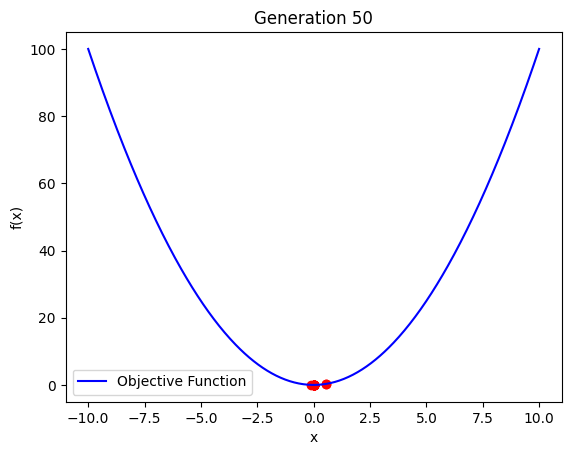

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# تابع هدف
def objective_function(x):
    return x**2 

# تولید جمعیت اولیه
def generate_initial_population(pop_size, chromosome_length):
    return [random.uniform(-10, 10) for _ in range(pop_size)]

# محاسبه برازندگی
def calculate_fitness(population):
    return [1 / objective_function(individual) for individual in population]

# انتخاب والدین
def select_parents(population, fitness, num_parents):
    total_fitness = sum(fitness)
    probabilities = [f / total_fitness for f in fitness]
    parents = random.choices(population, weights=probabilities, k=num_parents)
    return parents

# عملیات ترکیب
def crossover(parents, offspring_size):
    offspring = []
    for _ in range(offspring_size):
        parent1, parent2 = random.sample(parents, 2)
        child = (parent1 + parent2) / 2
        offspring.append(child)
    return offspring

# عملیات جهش
def mutate(offspring, mutation_rate):
    for i in range(len(offspring)):
        if random.random() < mutation_rate:
            offspring[i] += random.uniform(-1, 1)
    return offspring

# الگوریتم ژنتیک اصلی
def genetic_algorithm_with_animation(pop_size, num_generations, mutation_rate):
    population = generate_initial_population(pop_size, 1)
    all_generations = [population.copy()]
    
    for generation in range(num_generations):
        fitness = calculate_fitness(population)
        parents = select_parents(population, fitness, pop_size // 2)
        offspring = crossover(parents, pop_size - len(parents))
        offspring = mutate(offspring, mutation_rate)
        population = parents + offspring
        all_generations.append(population.copy())
    
    return all_generations

# تابع برای نمایش انیمیشن
def plot_animation_to_gif(all_generations):
    fig, ax = plt.subplots()
    x_vals = np.linspace(-10, 10, 500)
    y_vals = objective_function(x_vals)
    ax.plot(x_vals, y_vals, label="Objective Function", color="blue")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.set_title("Genetic Algorithm Animation")
    ax.legend()
    
    sc = ax.scatter([], [], color="red", label="Population")
    
    def update(frame):
        current_population = all_generations[frame]
        sc.set_offsets([(x, objective_function(x)) for x in current_population])
        ax.set_title(f"Generation {frame}")
        return sc,
    
    ani = FuncAnimation(fig, update, frames=len(all_generations), interval=500, blit=True)
    
    # ذخیره انیمیشن به صورت GIF
    writer = PillowWriter(fps=2)
    ani.save("genetic_algorithm_animation.gif", writer=writer)
    print("Animation saved as 'genetic_algorithm_animation.gif'")

# اجرای الگوریتم
pop_size = 20
num_generations = 50
mutation_rate = 0.1

all_generations = genetic_algorithm_with_animation(pop_size, num_generations, mutation_rate)
plot_animation_to_gif(all_generations)